___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [37]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.


In [54]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [55]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [56]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [57]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [58]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [59]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [60]:
bank_stocks.head()

Bank Ticker    BAC                                        C                 \
Stock Info    Open     High    Low  Close     Volume   Open    High    Low   
Date                                                                         
2020-05-29   24.42  24.9100  24.06  24.12  113923769  48.02  49.480  47.56   
2020-05-28   26.08  26.1400  24.79  24.86   84436774  52.99  53.010  49.11   
2020-05-27   26.07  26.1700  24.97  25.98  117672717  51.68  52.390  49.86   
2020-05-26   23.75  24.6000  23.67  24.28  119485461  46.20  48.900  45.98   
2020-05-22   22.93  22.9502  22.46  22.66   48107033  44.77  45.045  43.69   

Bank Ticker                   ...      MS                                   \
Stock Info   Close    Volume  ...    Open    High     Low  Close    Volume   
Date                          ...                                            
2020-05-29   47.91  35900474  ...  44.010  44.790  43.520  44.20  13102217   
2020-05-28   49.16  38022028  ...  47.250  47.320  44.275  44.40  17617296   
2020-05-27   52.26  43660514  ...  45.780  46.920  45.310  46.86  25892352   
2020-05-26   48.17  34429307  ...  41.865  43.785  41.550  43.69  19709852   
2020-05-22   44.10  22631719  ...  40.230  40.540  39.800  40.13   6468870   

Bank Ticker    WFC                                  
Stock Info    Open   High     Low  Close    Volume  
Date                                                
2020-05-29   26.50  27.07  26.090  26.47  51382843  
2020-05-28   28.32  28.37  27.120  27.22  51606629  
2020-05-27   27.80  28.26  26.835  27.95  61962965  
2020-05-26   25.05  26.51  25.040  26.26  57720312  
2020-05-22   24.44  24.49  23.920  24.17  30415297  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [61]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     35.414
C       80.515
GS     261.710
JPM    138.750
MS      56.637
WFC     59.723
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [64]:
returns = pd.DataFrame()
returns

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [65]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2020-05-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28,0.030680,0.026091,0.017711,0.026205,0.004525,0.028334
2020-05-27,0.045052,0.063059,0.041956,0.015121,0.055405,0.026819
2020-05-26,-0.065435,-0.078263,-0.064888,-0.054750,-0.067648,-0.060465
2020-05-22,-0.066722,-0.084492,-0.082273,-0.066270,-0.081483,-0.079589


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

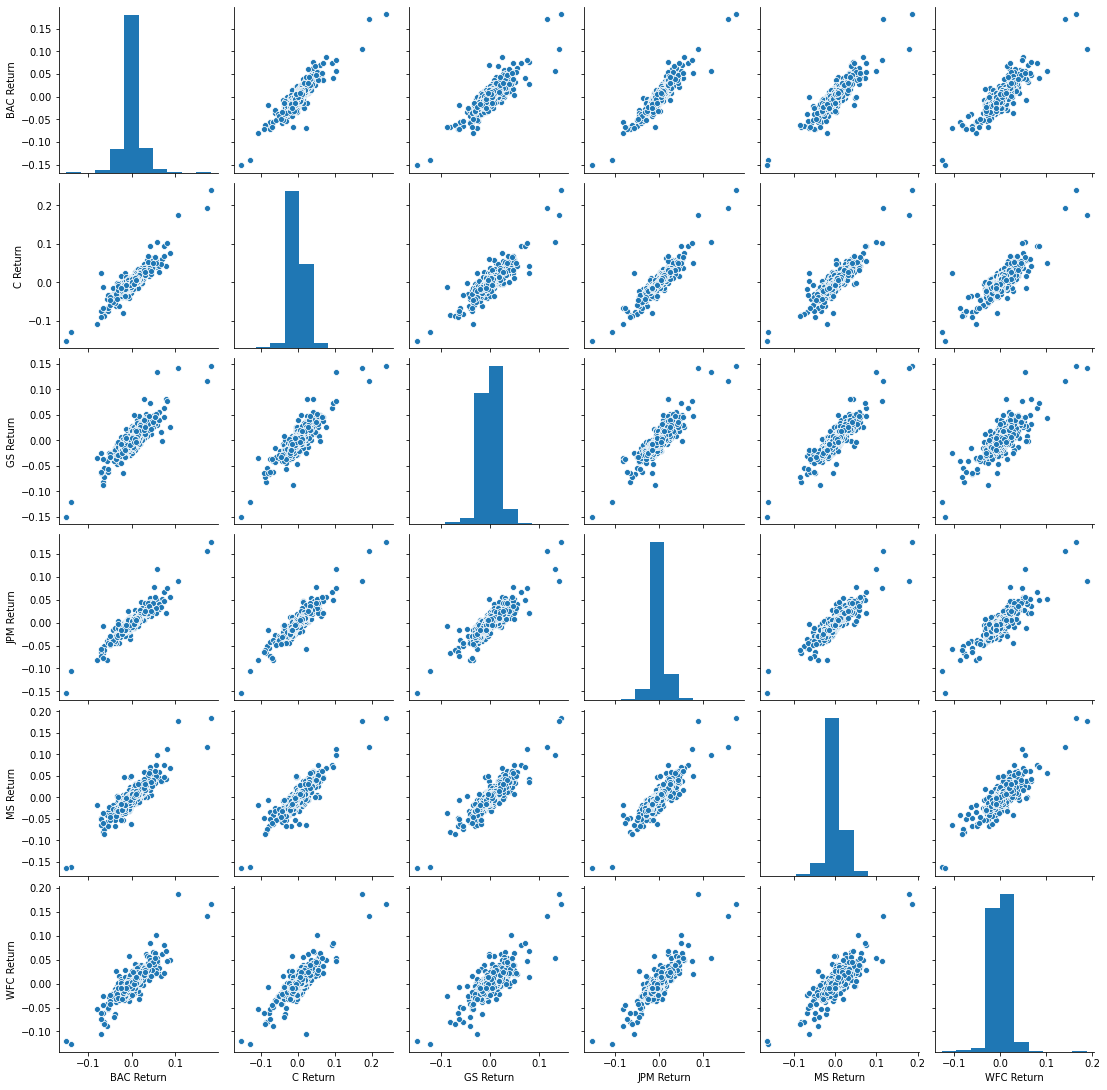

In [66]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [77]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [78]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [94]:
returns.std() # Citigroup riskiest

BAC Return    0.021083
C Return      0.022611
GS Return     0.019381
JPM Return    0.018337
MS Return     0.021582
WFC Return    0.019400
dtype: float64

<function __main__.<lambda>(x)>

In [183]:
for x in range(len(returns)):
    y=lambda x:((returns.index[x]>datetime.datetime(2018,1,1) & returns.index[x]<datetime.datetime(2019,1,1))==True)
y

<function __main__.<lambda>(x)>

In [194]:
len(returns)

1257

In [195]:
returns.iloc[lambda x:((returns.index[0:len(returns)]>datetime.datetime(2018,1,1)) & (returns.index[0:len(returns)]<datetime.datetime(2019,1,1))==True) ,:].std()

BAC Return    0.015644
C Return      0.015319
GS Return     0.016481
JPM Return    0.014036
MS Return     0.017328
WFC Return    0.015098
dtype: float64

In [82]:
returns.ix['2018-01-01':'2019-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

AttributeError: 'DataFrame' object has no attribute 'ix'

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

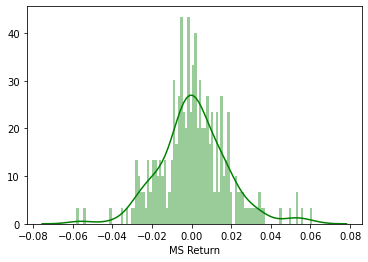

In [200]:
sns.distplot(returns.iloc[lambda x:((returns.index[0:len(returns)]>datetime.datetime(2018,1,1)) & (returns.index[0:len(returns)]<datetime.datetime(2019,1,1))==True) ,
                          :]['MS Return'],color='green',bins=100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


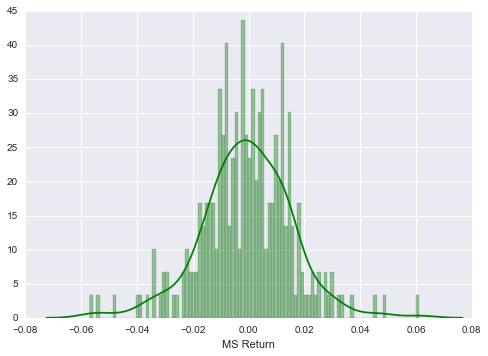

In [18]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


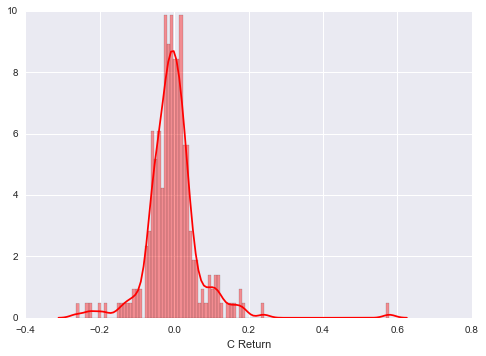

In [19]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

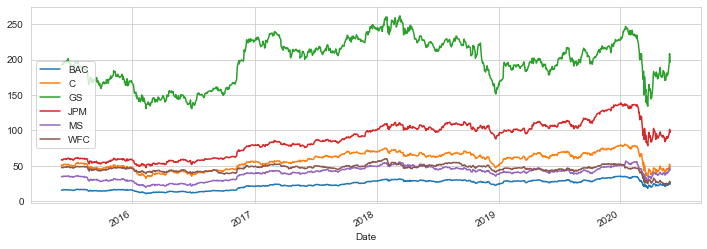

In [202]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

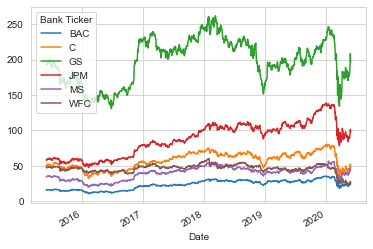

In [203]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [204]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [205]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

AttributeError: 'Series' object has no attribute 'ix'

<Figure size 864x432 with 0 Axes>

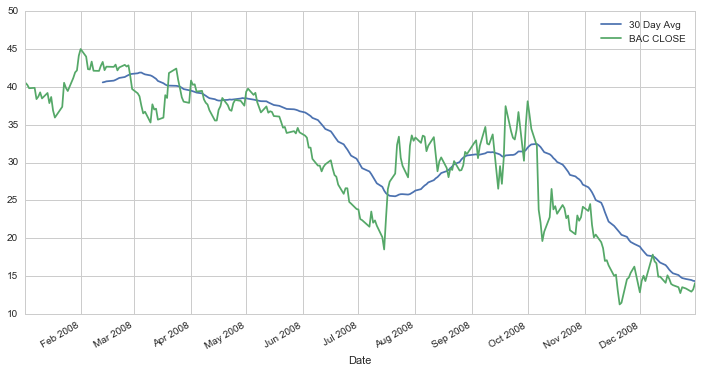

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

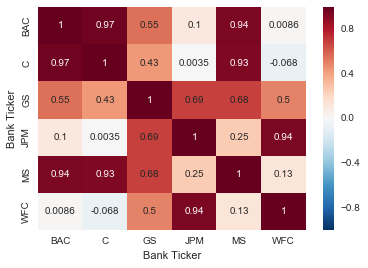

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

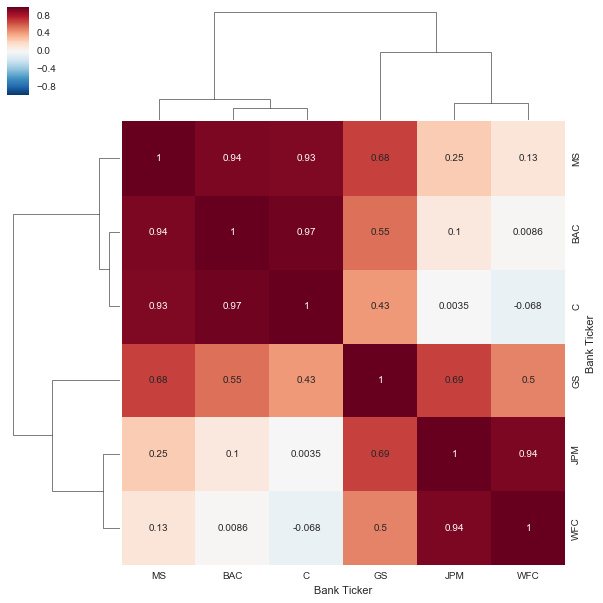

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [28]:
BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [29]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.